In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import warnings
warnings.filterwarnings("ignore")

# Load the dataset
df = pd.read_csv(r"C:\Users\Asad shaikh\Documents\wine.csv")

# Task 1: Exploratory Data Analysis (EDA)
print("Dataset Info:")
print(df.info())
print("\nDataset Description:")
print(df.describe())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB
None

Dataset Description:
             Type     Alcohol       Malic         Ash  Alcalinity 

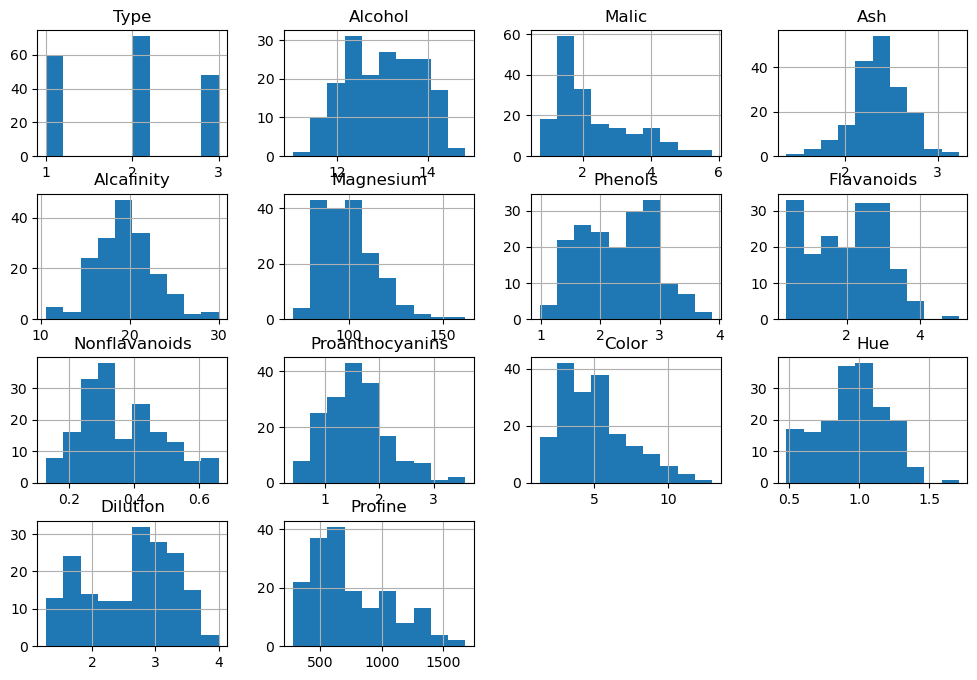

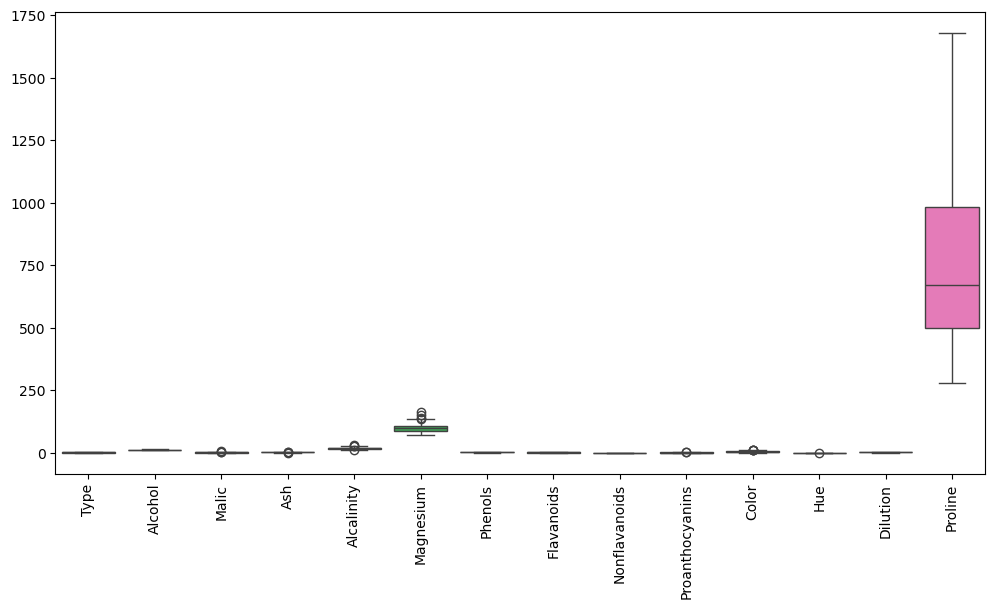

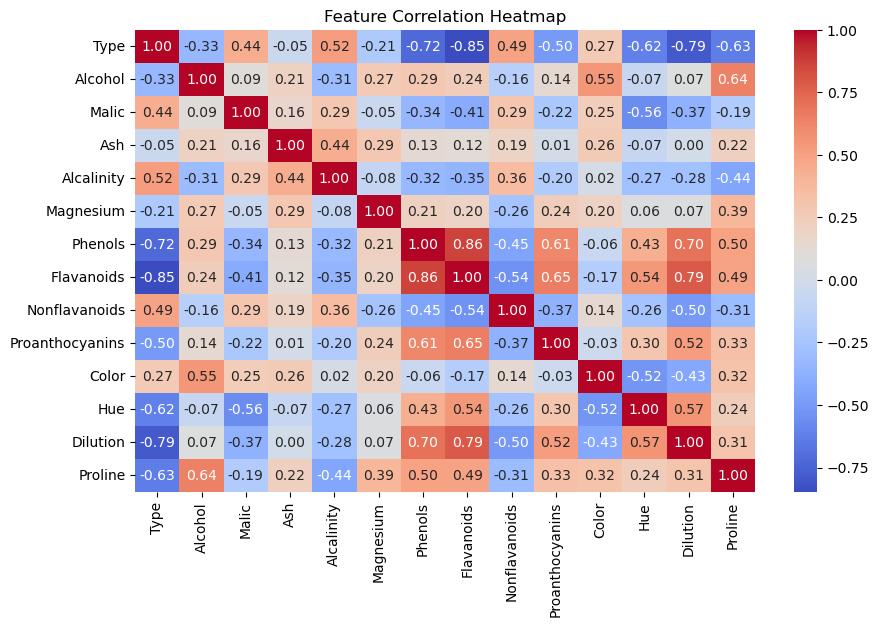

In [2]:
# Histograms & Box Plots
df.hist(figsize=(12, 8))
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

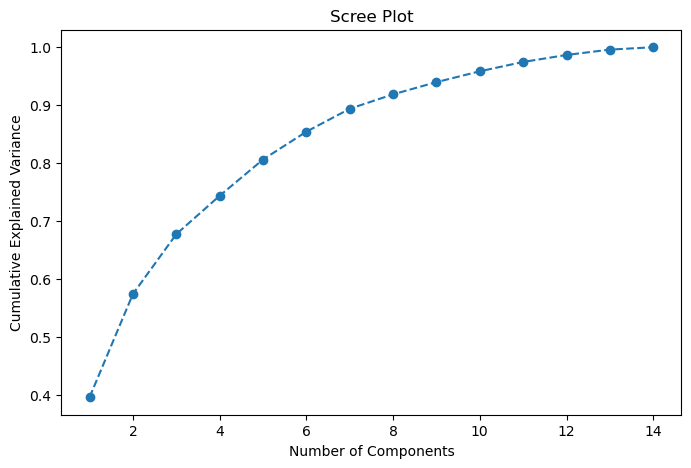

Optimal number of components: 10


In [3]:
# Task 2: PCA for Dimensionality Reduction
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Apply PCA
pca = PCA()
pca_components = pca.fit_transform(df_scaled)

# Scree Plot (Explained Variance)
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
         np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.show()

# Choosing the optimal number of components
optimal_components = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.95) + 1
print(f"Optimal number of components: {optimal_components}")

# Transform data using optimal PCA components
pca = PCA(n_components=optimal_components)
df_pca = pca.fit_transform(df_scaled)

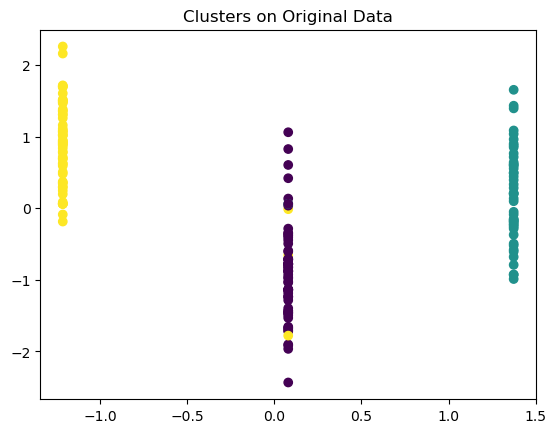

Silhouette Score (Original Data): 0.306
Davies-Bouldin Index (Original Data): 1.316


In [4]:
# Task 3: Clustering on Original Data
kmeans_original = KMeans(n_clusters=3, random_state=42)
clusters_original = kmeans_original.fit_predict(df_scaled)

plt.scatter(df_scaled[:, 0], df_scaled[:, 1], c=clusters_original, cmap="viridis")
plt.title("Clusters on Original Data")
plt.show()

sil_original = silhouette_score(df_scaled, clusters_original)
db_original = davies_bouldin_score(df_scaled, clusters_original)
print(f"Silhouette Score (Original Data): {sil_original:.3f}")
print(f"Davies-Bouldin Index (Original Data): {db_original:.3f}")

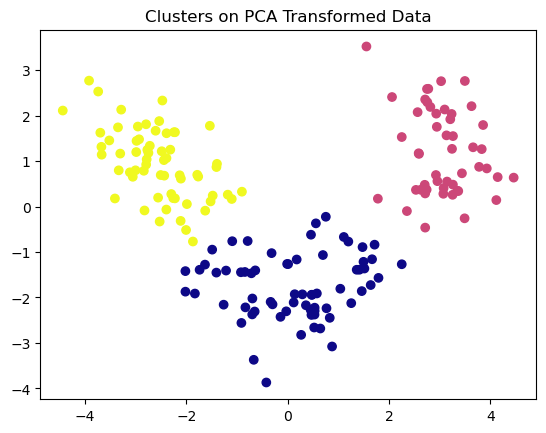

Silhouette Score (PCA Data): 0.323
Davies-Bouldin Index (PCA Data): 1.258


In [5]:
# Task 4: Clustering on PCA Data
kmeans_pca = KMeans(n_clusters=3, random_state=42)
clusters_pca = kmeans_pca.fit_predict(df_pca)

plt.scatter(df_pca[:, 0], df_pca[:, 1], c=clusters_pca, cmap="plasma")
plt.title("Clusters on PCA Transformed Data")
plt.show()

sil_pca = silhouette_score(df_pca, clusters_pca)
db_pca = davies_bouldin_score(df_pca, clusters_pca)
print(f"Silhouette Score (PCA Data): {sil_pca:.3f}")
print(f"Davies-Bouldin Index (PCA Data): {db_pca:.3f}")


In [6]:
# Task 5: Comparison & Analysis
print("\nComparison of Clustering Performance:")
print(f"Silhouette Score Before PCA: {sil_original:.3f}, After PCA: {sil_pca:.3f}")
print(f"Davies-Bouldin Index Before PCA: {db_original:.3f}, After PCA: {db_pca:.3f}")


Comparison of Clustering Performance:
Silhouette Score Before PCA: 0.306, After PCA: 0.323
Davies-Bouldin Index Before PCA: 1.316, After PCA: 1.258


In [7]:
# Task 6: Conclusion & Insights
if sil_pca > sil_original:
    print("\nPCA improved clustering performance by removing noise and redundancy.")
else:
    print("\nPCA reduced dimensionality but might have lost important information.")

print("Key Findings:")
print("- PCA helps in reducing dimensionality while retaining essential patterns.")
print("- Clustering may perform better with reduced dimensions as it eliminates noise.")
print("- If PCA significantly reduces performance, original data might be more informative.")


PCA improved clustering performance by removing noise and redundancy.
Key Findings:
- PCA helps in reducing dimensionality while retaining essential patterns.
- Clustering may perform better with reduced dimensions as it eliminates noise.
- If PCA significantly reduces performance, original data might be more informative.
